In [1]:
import numpy as np

import sys
sys.path.insert(0, '../src')
from utils import *

AWS_FOLDER_COMPUTE = "./saved_results/aws_computed/"

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Import all the variables from the dump files

fred_max_len_list = load_variables("fred_max_len_list.dump", AWS_FOLDER_COMPUTE)
int_max_len_list = load_variables("int_max_len_list.dump", AWS_FOLDER_COMPUTE)
#ahp_max_len_list = load_variables("ahp_max_len_list.dump", AWS_FOLDER_COMPUTE)

fred_time_list = load_variables("fred_time_list.dump", AWS_FOLDER_COMPUTE)
int_time_list = load_variables("int_time_list.dump", AWS_FOLDER_COMPUTE)
#mat_time_list = load_variables("mat_time_list.dump", AWS_FOLDER_COMPUTE)
#ahp_time_list = load_variables("ahp_time_list.dump", AWS_FOLDER_COMPUTE)

smN = load_variables("smN.dump", AWS_FOLDER_COMPUTE)

In [3]:
for v in smN:
    print(v)

('random', 5, 30)
('decreasing', 5, 30)
('increasing', 5, 30)
('random', 10, 30)
('decreasing', 10, 30)
('increasing', 10, 30)
('random', 20, 30)
('decreasing', 20, 30)
('increasing', 20, 30)
('random', 5, 60)
('decreasing', 5, 60)
('increasing', 5, 60)
('random', 10, 60)
('decreasing', 10, 60)
('increasing', 10, 60)
('random', 20, 60)
('decreasing', 20, 60)
('increasing', 20, 60)
('random', 5, 120)
('decreasing', 5, 120)
('increasing', 5, 120)
('random', 10, 120)
('decreasing', 10, 120)
('increasing', 10, 120)
('random', 20, 120)
('decreasing', 20, 120)
('increasing', 20, 120)


In [4]:
mN_tuples=list(zip(*list(zip(*smN))[1:])) # remove the structure name and leave a list of (m,N)

In [5]:
mN_tuples

[(5, 30),
 (5, 30),
 (5, 30),
 (10, 30),
 (10, 30),
 (10, 30),
 (20, 30),
 (20, 30),
 (20, 30),
 (5, 60),
 (5, 60),
 (5, 60),
 (10, 60),
 (10, 60),
 (10, 60),
 (20, 60),
 (20, 60),
 (20, 60),
 (5, 120),
 (5, 120),
 (5, 120),
 (10, 120),
 (10, 120),
 (10, 120),
 (20, 120),
 (20, 120),
 (20, 120)]

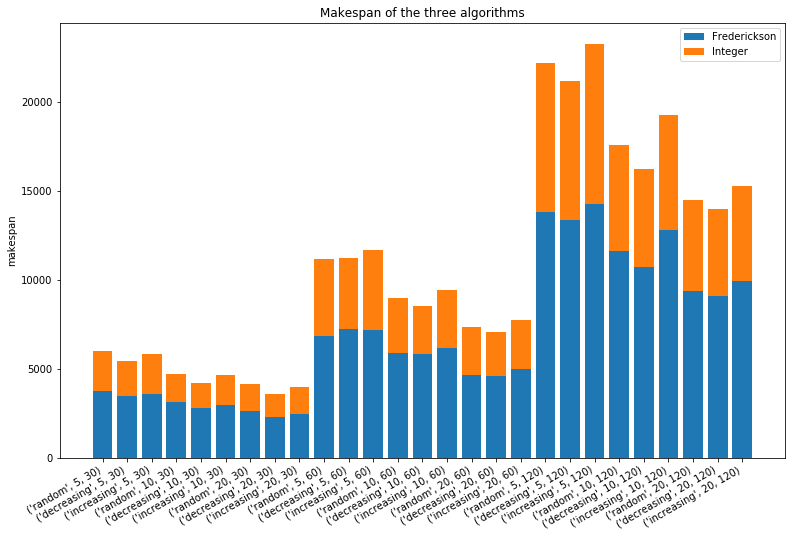

In [6]:
# Show the data on a stacked bar plot
xs = np.arange(0, len(smN))

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)

top = np.zeros(len(xs))
fred_bars = plt.bar(xs, fred_max_len_list)
top = top + fred_max_len_list
int_bars= plt.bar(xs, int_max_len_list, bottom=top)
top = top + int_max_len_list
#ahp_bars = plt.bar(xs, ahp_max_len_list, bottom=top)

plt.ylabel("makespan")
plt.title("Makespan of the three algorithms")
plt.xticks(xs, smN)

#plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Integer", "AHP"))
plt.legend((fred_bars, int_bars), ("Frederickson", "Integer"))

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

In [7]:
def compute_labels(smn):
    labels = []
    for s,m,n in smn:
        labels.append("{} rob, {} mod".format(m,n))
    
    return labels

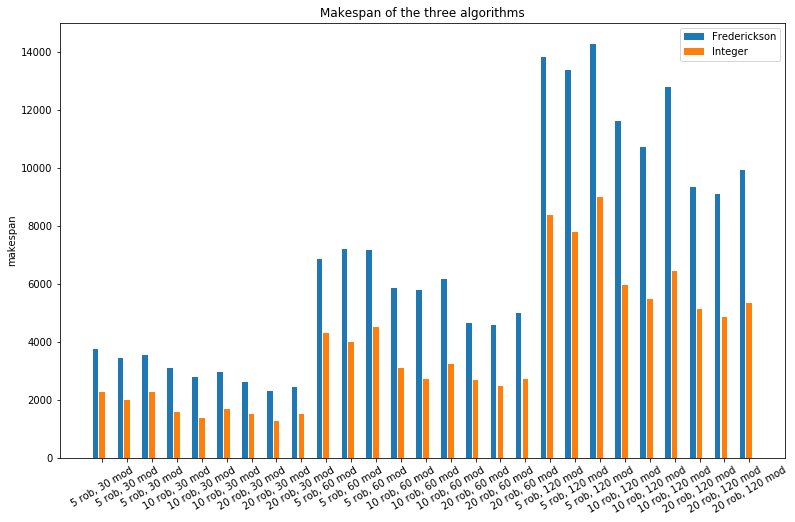

In [8]:
# Grouped bar plot

width = 0.5 # width of each bar
bar_dist = 0.1 # distance between bars of the same groups
group_dist = 0.5 # distance between bars of different groups
x_dist = width*3 + bar_dist*2 + group_dist

xs = np.arange(0, len(smN)) * x_dist # scale the x coordinates to make space to the bars

int_xs = xs
fred_xs = xs - width - bar_dist
#ahp_xs = int_xs + width + bar_dist

fig, ax = plt.subplots() # needed to rotate the labels

fred_bars = plt.bar(fred_xs, fred_max_len_list, width)
int_bars= plt.bar(int_xs, int_max_len_list, width)
#ahp_bars = plt.bar(ahp_xs, ahp_max_len_list, width)

plt.ylabel("makespan")
plt.title("Makespan of the three algorithms")
plt.xticks(xs, compute_labels(smN))

#plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Integer", "AHP"))
plt.legend((fred_bars, int_bars), ("Frederickson", "Integer"))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='center')

fig.set_size_inches(13, 8)
fig.patch.set_facecolor('white')

plt.show()